<a href="https://colab.research.google.com/github/AndySAnker/Exp2SimGAN/blob/main/Exp2SimGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exp2SimGAN
**Github:** https://github.com/AndySAnker/Exp2SimGAN

**Paper:** Using generative adversarial networks to match experimental and simulated inelastic neutron scattering data

**Questions:** andy@chem.ku.dk

Welcome to Exp2SimGAN that is an machine learning model to translate between experimental- and simulated data. We especially use it on scattering-, spectroscopy-, and imaging data within materials chemistry..

This script guides you through a simple example of how to use Exp2SimGAN to match simulated- and experimental inelastic neutron scattering (INS) data.


# First install requirements for Exp2SimGAN (this step takes 10 - 20 minutes)

In [1]:
%%capture
#!git clone https://github.com/EmilSkaaning/DeepStruc
!wget https://sid.erda.dk/share_redirect/evXHKjYjlo
!unzip evXHKjYjlo
!pip install pytorch_lightning torch-geometric==1.7.2 torch-scatter
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-1.10.1+cpu.html
!pip install matplotlib ipywidgets dominate
from google.colab import output, files
from IPython.display import Image
import matplotlib.pyplot as plt
import shutil
import os
os.chdir("Exp2SimGAN")


FileNotFoundError: ignored

# Example of how to use Exp2SimGAN on INS data

dataroot = path to data we want to predict on

name     = name of loaded model

epoch    = epoch of loaded model 

model    = model to use

results_dir = path to the results folder


## Predict with Exp2SimGAN

In [8]:
# Use Exp2SimGAN on the INS data
!python test.py  --dataroot test_Data --name dataset_All_balanced --results_dir results/test_Data --epoch 400 --model acdcl --input_nc 1 --output_nc 1


----------------- Options ---------------
                 DCL_mode: DCL                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: test_Data                     	[default: placeholder]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: 400                           	[default: latest]
                     eval: False                         
        flip_equivariance: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        
                 input_nc: 1                   

# Let us visualize some of the results

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.9 MB/s 
     |████████████████████████████████| 965 kB 63.6 MB/s 


ValueError: ignored

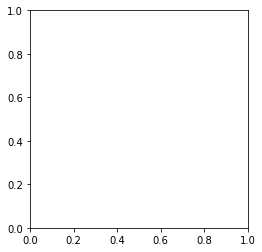

In [44]:
import matplotlib.image as mpimg
img = mpimg.imread('results/test_Data/dataset_All_balanced/test_400/images/real_A/0_Rb2MnF4_maps_128_8000.png')

fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
ax[0].imshow(img, cmap="turbo")

**Title** Description

## Download the results


In [38]:
# Download the results
!zip -r "results/test_Data.zip" "results/test_Data"
files.download("results/test_Data.zip")

# Cite
If you use our code or our results, please consider citing our papers. Thanks in advance!
```
@article{anker2022Exp2SimGAN,
  title={Using generative adversarial networks to match experimental and simulated inelastic neutron scattering data},
  author={Andy S. Anker, Keith T. Butler, Manh D. Le, Toby G. Perring, Jeyan Thiyagalingam},
  year={2022}}
```

# LICENSE
This project is licensed under the Apache License Version 2.0, January 2004 - see the LICENSE file at https://github.com/EmilSkaaning/DeepStruc/blob/main/LICENSE.md for details.